Defincion de módulos con scripts de funciones

In [31]:
#Para setting de rutas
import sys
import os

#Añadir el directorio raíz del proyecto
sys.path.append(os.path.abspath(os.path.join('..')))

#Importar modulos
import Paquete.carga_datos as cdata
import Paquete.preprocesamiento as prep
import Paquete.visualizaciones as vis
import Paquete.modelaje as md

#Para manejo de datos y splitting
from sklearn.model_selection import train_test_split
import pandas as pd

#Para mantener output cells mas limpias
import warnings
warnings.filterwarnings(action='ignore')


#para que sea replicable el ejercicio con una random seed
seed = 123

Lectura de datos

In [32]:
#genera la ruta en base al nombre del archivo input
ruta = cdata.GetRutaInput('Data.xlsx')
data = cdata.LecturaData(ruta)

In [33]:
#visualizar el dataframe
data

,customerID,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,7590-VHVEG,29.85,29.85,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
1,5575-GNVDE,56.95,1889.5,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,Yes
2,3668-QPYBK,53.85,108.15,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,7795-CFOCW,42.30,1840.75,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),Yes
4,9237-HQITU,70.70,151.65,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,84.80,NaN,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,No
7039,2234-XADUH,103.20,NaN,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),No
7040,4801-JZAZL,29.60,NaN,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
7041,8361-LTMKD,74.40,306.6,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,Yes


In [34]:
#Filas y columnas
data.shape

(7043, 21)

In [35]:
#Tipo de datos
data.dtypes

customerID           object
MonthlyCharges      float64
TotalCharges         object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
Churn                object
dtype: object

In [36]:
#Cardinalidad de variables
prep.UnicosFeature(data)

{'customerID': 7043,
 'MonthlyCharges': 1585,
 'TotalCharges': 6513,
 'gender': 2,
 'SeniorCitizen': 2,
 'Partner': 2,
 'Dependents': 2,
 'tenure': 73,
 'PhoneService': 2,
 'MultipleLines': 3,
 'InternetService': 3,
 'OnlineSecurity': 3,
 'OnlineBackup': 3,
 'DeviceProtection': 3,
 'TechSupport': 3,
 'StreamingTV': 3,
 'StreamingMovies': 3,
 'Contract': 3,
 'PaperlessBilling': 2,
 'PaymentMethod': 4,
 'Churn': 2}

In [37]:
#Recuento de vacíos
data.isna().sum()

customerID           0
MonthlyCharges       7
TotalCharges        20
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
Churn                0
dtype: int64

In [38]:
#Drop de ID customer, al ser unica no tiene valor predictivo
data= data.drop(['customerID'], axis = 1)

Splitting de data en training y testing (para evitar data leakeage)

In [39]:
#Definición de variables por rol en el modelo
Target ='Churn'
FeaturesNumericos = ['MonthlyCharges', 'TotalCharges', 'tenure']
FeaturesCategoricos = data.columns.drop(Target).drop(FeaturesNumericos)


In [40]:
#Labeling
X = data.drop(columns = Target, inplace = False)
y = pd.DataFrame(data[Target].map({'Yes': 1, 'No':0}))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = seed)

Preprocesamiento Variables Numericas (sobre training set)

In [41]:
#Divison de X en numericas y categoricas para facilitar el preprocessing
X_num = X_train[FeaturesNumericos]
X_cat = X_train[FeaturesCategoricos]

#Aplicación de funciones a df de variables numericas
X_num = prep.CambioNoNumerico(X_num, X_num.columns)
X_num = prep.ToFloat(X_num, X_num.columns)
X_num = prep.RellenoNA(X_num, X_num.columns)

In [42]:
#Checks
print("Cantidad de NAs en Dataframe: ", X_num.isna().sum().sum())
print("Tipo de datos: ", list(zip(FeaturesNumericos, X_num.dtypes.to_list())))

Cantidad de NAs en Dataframe:  0
Tipo de datos:  [('MonthlyCharges', dtype('float64')), ('TotalCharges', dtype('float64')), ('tenure', dtype('float64'))]


Visualizaciones (sobre training set)

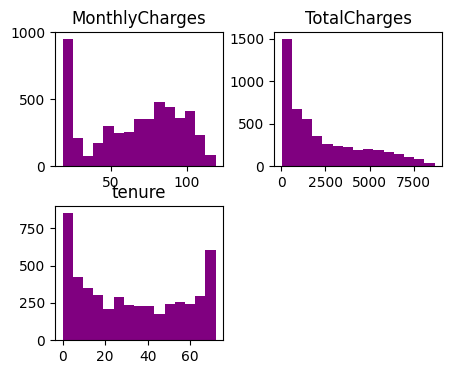

In [43]:
#Histogramas
vis.HistogramasIndividuales(X_num)

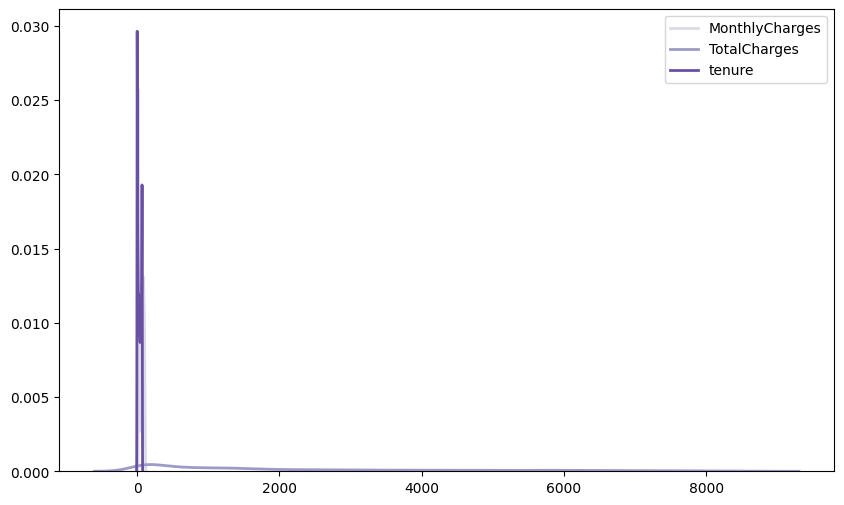

In [44]:
#Densidades suavizadas con kernell
vis.DensidadSuavizadaSimultanea(X_num, X_num.columns)

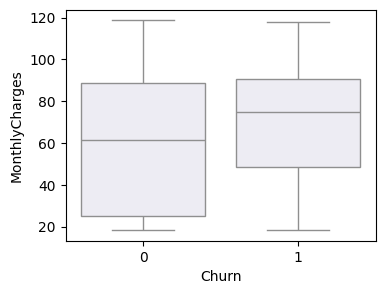

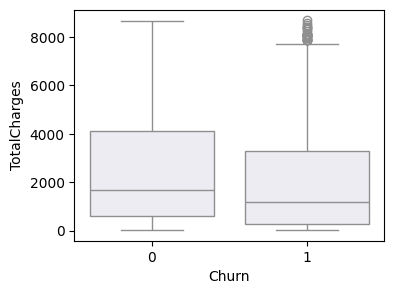

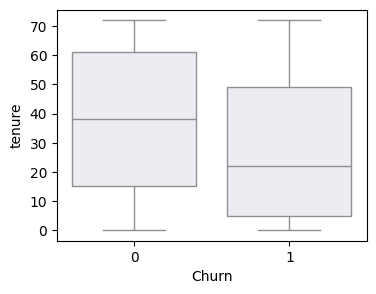

In [45]:
#Boxplot iterativo
vis.BoxPlotIterativo(X_num, y_train, Target)

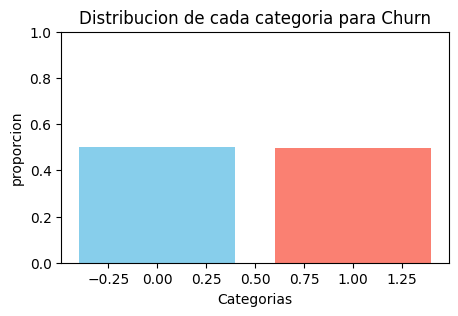

In [46]:
#Evaluacion de desbalanceo de clases
vis.PlotDesbalanceoClass(y_train,y_train.columns)

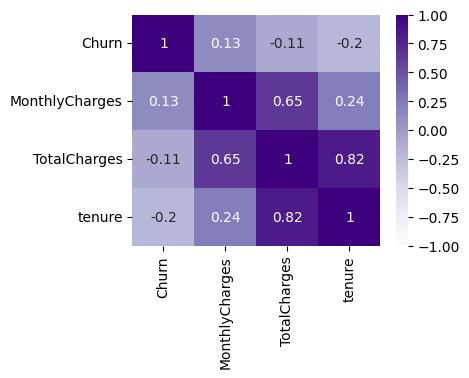

In [47]:
#Heatmap correlaciones
vis.HeatmapCorr(X_num, y_train, annotacion=True, mostrar_ejes= True, mostrar_barra_color=True, largo=4, ancho=3)

In [48]:
#Drop de columnas numericas
Col_Numericas_ToDrop = ['TotalCharges']
X_num = X_num.drop(Col_Numericas_ToDrop, axis = 1)

Preprocesamiento Categorico (sobre training set)

In [49]:
#Simplificacion de features con cardinalidad de 3 (transformados a binarios)
Features_a_Binarios = ['MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
prep.aBinario(X_cat, Features_a_Binarios)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
1479,Female,0,No,No,No,No,DSL,No,No,Yes,No,Yes,Yes,One year,Yes,Electronic check
2377,Male,0,No,Yes,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
6613,Female,0,No,No,Yes,No,No,No,No,No,No,No,No,Month-to-month,No,Mailed check
6468,Male,0,Yes,No,Yes,No,DSL,No,No,No,No,No,No,One year,No,Electronic check
2668,Male,0,No,Yes,Yes,No,No,No,No,No,No,No,No,Month-to-month,No,Mailed check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5218,Male,0,Yes,Yes,Yes,No,No,No,No,No,No,No,No,One year,Yes,Mailed check
4060,Male,0,Yes,Yes,Yes,Yes,DSL,No,No,Yes,No,No,Yes,Two year,No,Credit card (automatic)
1346,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check
3454,Female,1,Yes,Yes,No,No,DSL,No,Yes,Yes,No,No,No,Month-to-month,Yes,Mailed check


In [50]:
X_cat = prep.EncodingBinario(X_cat, X_cat.columns)

In [51]:
#Prueba Chi2 de independencia para eliminar features cateogoricos
ColsToDrop = prep.Chi2Filtering(X_cat, X_cat.columns, y_train, 0.1)
X_cat = X_cat.drop(columns = ColsToDrop)

Features a excluir:  ['DeviceProtection', 'PhoneService', 'gender']


In [52]:
#One hot encoding
X_cat = prep.OneHotEncode(X_cat, X_cat.columns)

Preprocesamiento conjunto (sobre Training set)

In [53]:
X_train =pd.concat([X_num,X_cat], axis = 1)
X_train

,MonthlyCharges,tenure,SeniorCitizen,Partner,Dependents,MultipleLines,OnlineSecurity,OnlineBackup,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1479,49.05,44.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
2377,55.30,47.0,0,0,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0
6613,20.40,3.0,0,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,0,0,0,1
6468,44.60,14.0,0,1,0,0,0,0,0,1,1,1,1,0,0,0,1,0,0,0,1,0
2668,19.75,1.0,0,0,1,0,0,0,0,1,1,1,0,0,1,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5218,19.70,0.0,0,1,1,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1
4060,63.35,54.0,0,1,1,1,0,0,0,1,0,1,1,0,0,0,0,1,0,1,0,0
1346,87.25,14.0,0,1,1,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0
3454,35.65,29.0,1,1,1,0,0,1,0,1,1,0,1,0,0,1,0,0,0,0,0,1


In [54]:
#Scaling
X_train = prep.escala_data(X_train, method= 'standard')
X_train

,MonthlyCharges,tenure,SeniorCitizen,Partner,Dependents,MultipleLines,OnlineSecurity,OnlineBackup,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-0.525493,0.459838,-0.440119,-0.986701,-0.656868,-0.853943,-0.638252,-0.724499,-0.63542,-1.273711,-1.250481,-0.834560,1.380263,-0.887427,-0.523671,-1.098546,1.945869,-0.568449,-0.526814,-0.526814,1.413139,-0.549383
1,-0.316788,0.581957,-0.440119,-0.986701,1.522377,-0.853943,1.566780,1.380263,-0.63542,0.785107,0.799692,-0.834560,1.380263,-0.887427,-0.523671,0.910294,-0.513909,-0.568449,-0.526814,-0.526814,1.413139,-0.549383
2,-1.482195,-1.209111,-0.440119,-0.986701,-0.656868,-0.853943,-0.638252,-0.724499,-0.63542,0.785107,0.799692,1.198237,-0.724499,-0.887427,1.909597,0.910294,-0.513909,-0.568449,-0.526814,-0.526814,-0.707645,1.820223
3,-0.674091,-0.761344,-0.440119,1.013478,-0.656868,-0.853943,-0.638252,-0.724499,-0.63542,0.785107,0.799692,1.198237,1.380263,-0.887427,-0.523671,-1.098546,1.945869,-0.568449,-0.526814,-0.526814,1.413139,-0.549383
4,-1.503900,-1.290523,-0.440119,-0.986701,1.522377,-0.853943,-0.638252,-0.724499,-0.63542,0.785107,0.799692,1.198237,-0.724499,-0.887427,1.909597,0.910294,-0.513909,-0.568449,-0.526814,-0.526814,-0.707645,1.820223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4925,-1.505570,-1.331229,-0.440119,1.013478,1.522377,-0.853943,-0.638252,-0.724499,-0.63542,0.785107,0.799692,-0.834560,-0.724499,-0.887427,1.909597,-1.098546,1.945869,-0.568449,-0.526814,-0.526814,-0.707645,1.820223
4926,-0.047977,0.866899,-0.440119,1.013478,1.522377,1.171039,-0.638252,-0.724499,-0.63542,0.785107,-1.250481,1.198237,1.380263,-0.887427,-0.523671,-1.098546,-0.513909,1.759172,-0.526814,1.898203,-0.707645,-0.549383
4927,0.750110,-0.761344,-0.440119,1.013478,1.522377,1.171039,-0.638252,-0.724499,-0.63542,0.785107,-1.250481,-0.834560,-0.724499,1.126853,-0.523671,0.910294,-0.513909,-0.568449,-0.526814,-0.526814,1.413139,-0.549383
4928,-0.972956,-0.150753,2.272114,1.013478,1.522377,-0.853943,-0.638252,1.380263,-0.63542,0.785107,0.799692,-0.834560,1.380263,-0.887427,-0.523671,0.910294,-0.513909,-0.568449,-0.526814,-0.526814,-0.707645,1.820223


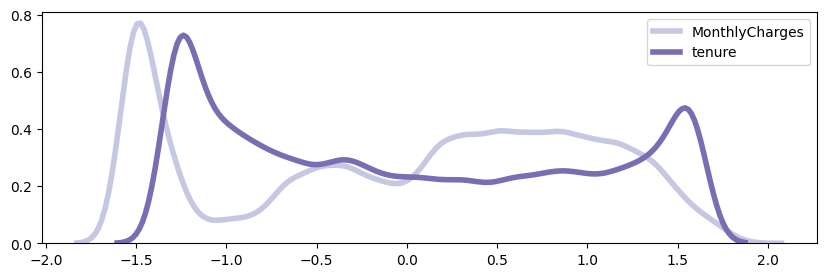

In [55]:
vis.DensidadSuavizadaSimultanea(X_train,['MonthlyCharges','tenure'], linewidth = 4,sizeL=10, sizeW=3)

Preprocesamiento (sobre Testing set)

In [56]:
X_num = X_test[FeaturesNumericos]
X_cat = X_test[FeaturesCategoricos]
#Aplicación de funciones a df de variables numericas

X_num = prep.CambioNoNumerico(X_num, X_num.columns)
X_num = prep.ToFloat(X_num, X_num.columns)
X_num = prep.RellenoNA(X_num, X_num.columns)

#Drop de columnas numericas
Col_Numericas_ToDrop = ['TotalCharges']
X_num = X_num.drop(Col_Numericas_ToDrop, axis = 1)

#Simplificacion de features con cardinalidad de 3 (transformados a binarios)
Features_a_Binarios = ['MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
prep.aBinario(X_cat, Features_a_Binarios)

X_cat = prep.EncodingBinario(X_cat, X_cat.columns)
X_cat = X_cat.drop(columns = ColsToDrop)
#One hot encoding
X_cat = prep.OneHotEncode(X_cat, X_cat.columns)
X_test =pd.concat([X_num,X_cat], axis = 1)

#Scaling
X_test = prep.escala_data(X_test, method= 'standard')

X_test

,MonthlyCharges,tenure,SeniorCitizen,Partner,Dependents,MultipleLines,OnlineSecurity,OnlineBackup,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-1.135233,-0.758391,-0.439444,-0.921219,-1.544739,-0.854721,-0.623873,-1.373540,-0.648831,-0.801922,-0.787654,-1.221370,1.385102,-0.881546,-0.531188,0.890054,-0.515043,-0.550193,-0.537042,-0.520922,1.390943,-0.534116
1,-1.360804,0.138831,-0.439444,-0.921219,0.647359,1.169972,-0.623873,0.728046,-0.648831,-0.801922,-0.787654,-1.221370,-0.721968,-0.881546,1.882574,-1.123527,-0.515043,1.817543,1.862050,-0.520922,-0.718937,-0.534116
2,-1.490878,-0.554477,-0.439444,1.085519,-1.544739,-0.854721,-0.623873,0.728046,-0.648831,-0.801922,-0.787654,-1.221370,-0.721968,-0.881546,1.882574,-1.123527,-0.515043,1.817543,-0.537042,-0.520922,-0.718937,1.872253
3,0.353205,0.465094,-0.439444,-0.921219,0.647359,1.169972,-0.623873,0.728046,-0.648831,-0.801922,-0.787654,0.818753,-0.721968,1.134371,-0.531188,0.890054,-0.515043,-0.550193,-0.537042,1.919673,-0.718937,-0.534116
4,-1.448069,0.791357,-0.439444,-0.921219,0.647359,-0.854721,-0.623873,0.728046,-0.648831,-0.801922,-0.787654,-1.221370,-0.721968,-0.881546,1.882574,-1.123527,-0.515043,1.817543,1.862050,-0.520922,-0.718937,-0.534116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2108,-1.508989,-1.166219,-0.439444,-0.921219,0.647359,-0.854721,-0.623873,0.728046,-0.648831,-0.801922,-0.787654,-1.221370,-0.721968,-0.881546,1.882574,0.890054,-0.515043,-0.550193,-0.537042,-0.520922,-0.718937,1.872253
2109,1.005220,0.220397,-0.439444,1.085519,-1.544739,1.169972,-0.623873,-1.373540,-0.648831,-0.801922,1.269593,0.818753,-0.721968,1.134371,-0.531188,0.890054,-0.515043,-0.550193,-0.537042,-0.520922,1.390943,-0.534116
2110,0.358145,1.443882,-0.439444,1.085519,-1.544739,1.169972,1.602890,0.728046,-0.648831,1.247004,1.269593,0.818753,1.385102,-0.881546,-0.531188,-1.123527,-0.515043,1.817543,-0.537042,-0.520922,1.390943,-0.534116
2111,0.838924,-1.043870,-0.439444,-0.921219,0.647359,1.169972,-0.623873,-1.373540,-0.648831,1.247004,-0.787654,0.818753,-0.721968,1.134371,-0.531188,0.890054,-0.515043,-0.550193,-0.537042,-0.520922,1.390943,-0.534116


Seleccion de Modelo

In [57]:
MetricaEval = 'accuracy'

In [58]:
#Regresion Logistica
md.SeleccionModelo(X_train, y_train, X_test, y_test, ModelSelected = 'Logistic Regression', metric = MetricaEval, seed = seed, iteraciones = 100 )

Mejores Parametros: {'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 200, 'C': 0.1}
Accuracy: 0.6408
Balanced Accuracy: 0.6410
Precision: 0.6552
Recall: 0.6316
F1 Score: 0.6432
ROC AUC: 0.6806

Matriz de confusion:
[[670 360]
 [399 684]]


LogisticRegression(C=0.1, max_iter=200, penalty='l1', solver='liblinear')

In [59]:
#k-Nearest Neighbors
md.SeleccionModelo(X_train, y_train, X_test, y_test, ModelSelected = 'KNN', metric = MetricaEval, seed = seed, iteraciones = 100)

Mejores Parametros: {'weights': 'uniform', 'p': 2, 'n_neighbors': 11, 'algorithm': 'auto'}
Accuracy: 0.5963
Balanced Accuracy: 0.5962
Precision: 0.6077
Recall: 0.5993
F1 Score: 0.6034
ROC AUC: 0.6266

Matriz de confusion:
[[611 419]
 [434 649]]


KNeighborsClassifier(n_neighbors=11)

In [60]:
#Gradient boosting
md.SeleccionModelo(X_train, y_train, X_test, y_test, ModelSelected = 'Gradient Boosting', metric = MetricaEval, seed = seed, iteraciones = 100 )